In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib as plt
import IPython.display as disp
import numpy as np

,session_id,Group,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,S0009QPW3,SADP,0.197204,0.188437,-0.073910,-0.029577,0.091751,0.039809,-0.003347,0.071752,-0.004556,0.149077,0.169664,0.154207
1,S0015SRH1,SCZP,0.083523,0.077612,0.044154,0.068226,0.107891,-0.058259,0.006798,0.105548,-0.030212,0.146827,0.137651,0.096658
2,S0023IXS1,BPP,0.060220,0.114342,0.002019,0.057420,0.045656,0.102310,-0.015956,0.110451,-0.014829,0.110719,-0.030335,0.094121
3,S0027SLU2,SCZP,0.101865,0.068121,-0.019243,0.072063,0.109495,0.075429,-0.049261,0.114441,-0.027362,0.160799,0.139472,0.128975
4,S0053KTM1,SADP,0.051044,0.036711,0.035319,0.064451,0.065408,0.026769,-0.023747,0.096941,-0.045002,0.142513,0.082962,0.099210


Text(0, 0.5, 'Group Count')

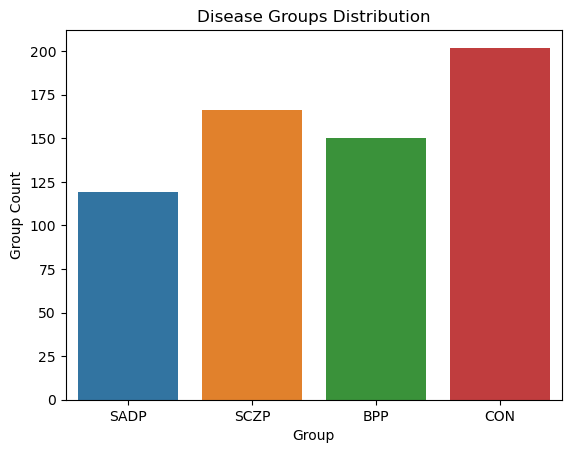

In [20]:
# Loading data

# Parcellated gbc with 718 features
#data = pd.read_csv('../../data/BSNIP_data/BSNIP_data/neural/neural_parcellated_gbc.csv')

# Parcellated gbc with 12 features (old)
#data = pd.read_csv('../../data/processed/pscalar/cole_anticevic_pscalar.csv')

# Parcellated gbc with 12 features (new)
data = pd.read_csv('../../data/processed/pscalar/BSNIP_cole_anticevic_2_pscalar.csv')

disp.display(data.head())

# Evaluating data imbalance

ax = sns.countplot(data, x='Group')
ax.set_title('Disease Groups Distribution')
ax.set_ylabel('Group Count')

In [21]:
data

,session_id,Group,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,S0009QPW3,SADP,0.197204,0.188437,-0.073910,-0.029577,0.091751,0.039809,-0.003347,0.071752,-0.004556,0.149077,0.169664,0.154207
1,S0015SRH1,SCZP,0.083523,0.077612,0.044154,0.068226,0.107891,-0.058259,0.006798,0.105548,-0.030212,0.146827,0.137651,0.096658
2,S0023IXS1,BPP,0.060220,0.114342,0.002019,0.057420,0.045656,0.102310,-0.015956,0.110451,-0.014829,0.110719,-0.030335,0.094121
3,S0027SLU2,SCZP,0.101865,0.068121,-0.019243,0.072063,0.109495,0.075429,-0.049261,0.114441,-0.027362,0.160799,0.139472,0.128975
4,S0053KTM1,SADP,0.051044,0.036711,0.035319,0.064451,0.065408,0.026769,-0.023747,0.096941,-0.045002,0.142513,0.082962,0.099210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,S9903MNH1,CON,0.041615,-0.091464,-0.025248,0.097881,-0.002097,0.058520,0.083927,0.094463,0.040060,0.140628,0.068508,0.086871
633,S9911MFE2,BPP,0.095353,0.009745,0.078837,0.120620,0.076857,0.087226,0.011415,0.062573,-0.091508,0.113248,0.038847,0.061209
634,S9967ESA3,BPP,0.063686,0.033891,0.023699,0.062646,0.045289,0.083430,-0.051920,0.048840,-0.070826,0.100395,0.075675,0.063417
635,S9976LRC1,CON,-0.026532,0.020144,0.042124,0.079248,0.113814,0.078303,-0.024345,0.116612,0.032389,0.094794,0.154145,0.135384


<Axes: xlabel='disease_status', ylabel='count'>

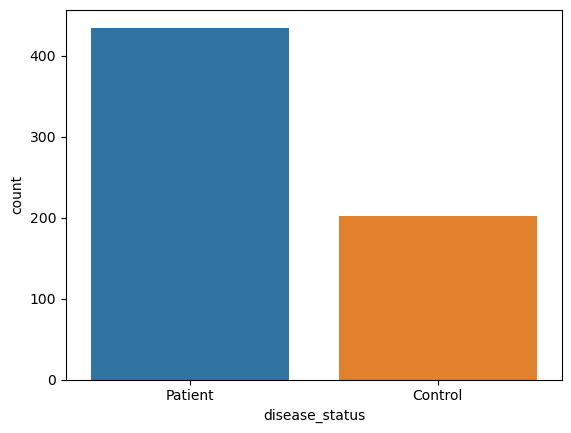

In [22]:
data['disease_status'] = data['Group'].apply(lambda x: 'Control' if x == 'CON' else 'Patient')

sns.countplot(data, x='disease_status')

# GBC 12 features (new)

## Disease Status Classification (Binary Classification)

In [26]:
# Parcellated gbc with 12 features (new)
data = pd.read_csv('../../data/processed/pscalar/BSNIP_cole_anticevic_2_pscalar.csv')
data['disease_status'] = data['Group'].apply(lambda x: 'Control' if x == 'CON' else 'Patient')
X = data.drop(['Group', 'disease_status', 'session_id'], axis=1)
y = data['disease_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyper-parameter tuning

model = MLPClassifier(tol=0.0001, max_iter=1000)

params ={
    'solver': ['lbfgs','adam', 'sgd'],
    'alpha': [10**x for x in range(-1, -13, -3)],
    'learning_rate': ['adaptive', 'invscaling', 'adaptive'],
    'hidden_layer_sizes': [(50), (100), (100, 50), (100, 100), (50, 100, 50), (100, 50, 100), (100, 100, 100)],
    'activation': ['relu', 'logistic', 'tanh']
}

searcher = RandomizedSearchCV(model, params, n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=1)

searcher.fit(X_train, y_train)

disp.display(f"Best accuracy achieved during hyper-parameter tuning is: {searcher.best_score_}")
disp.display(f"Best parameters are: {searcher.best_params_}")

# Computing accuracy (results)

train_ypred = searcher.predict(X_train)
acc_train = accuracy_score(y_train, train_ypred)
acc_CI_train = (np.std(train_ypred == y_train) / np.sqrt(len(train_ypred))) * 1.96
print(f"Train accuracy: {acc_train} +- {acc_CI_train}")

test_ypred = searcher.predict(X_test)
acc = accuracy_score(y_test, test_ypred)
acc_CI = (np.std(test_ypred == y_test) / np.sqrt(len(test_ypred))) * 1.96
print(f"Test accuracy: {acc} +- {acc_CI}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


'Best accuracy achieved during hyper-parameter tuning is: 0.7033391574451562'

"Best parameters are: {'solver': 'adam', 'learning_rate': 'invscaling', 'hidden_layer_sizes': (100, 100, 100), 'alpha': 1e-10, 'activation': 'relu'}"

Train accuracy: 0.8271119842829077 +- 0.032851997555848306
Test accuracy: 0.6171875 +- 0.08420787394261624


## Disease Classification (Multiclass classification)

In [28]:
# Parcellated gbc with 12 features (new)
data = pd.read_csv('../../data/processed/pscalar/BSNIP_cole_anticevic_2_pscalar.csv')
data['disease_status'] = data['Group'].apply(lambda x: 'Control' if x == 'CON' else 'Patient')
X = data.drop(['Group', 'disease_status', 'session_id'], axis=1)
y = data['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyper-parameter tuning

model = MLPClassifier(tol=0.0001, max_iter=1000)

params ={
    'solver': ['lbfgs','adam', 'sgd'],
    'alpha': [10**x for x in range(-1, -13, -3)],
    'learning_rate': ['adaptive', 'invscaling', 'adaptive'],
    'hidden_layer_sizes': [(50), (100), (100, 50), (100, 100), (50, 100, 50), (100, 50, 100), (100, 100, 100)],
    'activation': ['relu', 'logistic', 'tanh']
}

search = RandomizedSearchCV(model, params, n_iter=150, n_jobs=4).fit(X_train, y_train)
disp.display(f"Best accuracy achieved in hyper-parameter tuning is: {search.best_score_}")
disp.display(f"Best parameters: {search.best_params_}")

# Computing accuracy (results)

train_ypred = search.predict(X_train)
acc_train = accuracy_score(y_train, train_ypred)
acc_CI_train = (np.std(train_ypred == y_train) / np.sqrt(len(train_ypred))) * 1.96
print(f"Train accuracy: {acc_train} +- {acc_CI_train}")

test_ypred = search.predict(X_test)
acc = accuracy_score(y_test, test_ypred)
acc_CI = (np.std(test_ypred == y_test) / np.sqrt(len(test_ypred))) * 1.96

disp.display(f"Test score: {acc} +- {acc_CI}")

'Best accuracy achieved in hyper-parameter tuning is: 0.35365948359541843'

"Best parameters: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50), 'alpha': 1e-10, 'activation': 'tanh'}"

Train accuracy: 0.39096267190569745 +- 0.04239228077629413


'Test score: 0.3515625 +- 0.08271540870158306'

# GBC 12 features (old)

## Disease Status Classification (Binary Classification)

In [6]:
# Parcellated gbc with 12 features (old)
data = pd.read_csv('../../data/processed/pscalar/cole_anticevic_pscalar.csv')
data['disease_status'] = data['Group'].apply(lambda x: 'Control' if x == 'CON' else 'Patient')

X = data.drop(['Group', 'disease_status', 'session_id'], axis=1)
y = data['disease_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MLPClassifier(tol=0.0001, max_iter=1000)

# Hyperparameter tuning

params ={
    'solver': ['lbfgs','adam', 'sgd'],
    'alpha': [10**x for x in range(-1, -13, -3)],
    'learning_rate': ['adaptive', 'invscaling', 'adaptive'],
    'hidden_layer_sizes': [(50), (100), (100, 50), (100, 100), (50, 100, 50), (100, 50, 100), (100, 100, 100)],
    'activation': ['relu', 'logistic', 'tanh']
}

searcher = RandomizedSearchCV(model, params, n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=1)

searcher.fit(X_train, y_train)

disp.display(f"Best accuracy achieved during hyper-parameter tuning is: {searcher.best_score_}")
disp.display(f"Best parameters are: {searcher.best_params_}")

# Computing accuracy (results)

train_ypred = searcher.predict(X_train)
acc_train = accuracy_score(y_train, train_ypred)
acc_CI_train = (np.std(train_ypred == y_train) / np.sqrt(len(train_ypred))) * 1.96
print(f"Train accuracy: {acc_train} +- {acc_CI_train}")

test_ypred = searcher.predict(X_test)
acc = accuracy_score(y_test, test_ypred)
acc_CI = (np.std(test_ypred == y_test) / np.sqrt(len(test_ypred))) * 1.96
print(f"Test accuracy: {acc} +- {acc_CI}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


'Best accuracy achieved during hyper-parameter tuning is: 0.6876334692292758'

"Best parameters are: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 100), 'alpha': 0.0001, 'activation': 'relu'}"

Train accuracy: 0.6895874263261297 +- 0.04019402511687709
Test accuracy: 0.65625 +- 0.08228242794922103


## Disease Classification (Multiclass classification)

In [16]:
# Parcellated gbc with 12 features (old)
data = pd.read_csv('../../data/processed/pscalar/cole_anticevic_pscalar.csv')
data['disease_status'] = data['Group'].apply(lambda x: 'Control' if x == 'CON' else 'Patient')
X = data.drop(['Group', 'disease_status', 'session_id'], axis=1)
y = data['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MLPClassifier(tol=0.0001, max_iter=1000)

# Hyperparameter tuning

params ={
    'solver': ['lbfgs','adam', 'sgd'],
    'alpha': [10**x for x in range(-1, -13, -3)],
    'learning_rate': ['adaptive', 'invscaling', 'adaptive'],
    'hidden_layer_sizes': [(50), (100), (100, 50), (100, 100), (50, 100, 50), (100, 50, 100), (100, 100, 100)],
    'activation': ['relu', 'logistic', 'tanh']
}

search = RandomizedSearchCV(model, params, n_iter=150, n_jobs=-1).fit(X_train, y_train)
print(f"Best accuracy achieved in hyper-parameter tuning is: {search.best_score_}")
print(f"Best parameters:\n{search.best_params_}")

# Computing accuracy (results)

train_ypred = search.predict(X_train)
acc_train = accuracy_score(y_train, train_ypred)
acc_CI_train = (np.std(train_ypred == y_train) / np.sqrt(len(train_ypred))) * 1.96
disp.display(f"Train accuracy: {acc_train} +- {acc_CI_train}")

test_ypred = search.predict(X_test)
acc = accuracy_score(y_test, test_ypred)
acc_CI = (np.std(test_ypred == y_test) / np.sqrt(len(test_ypred))) * 1.96
disp.display(f"Test score: {acc} +- {acc_CI}")

Best accuracy achieved in hyper-parameter tuning is: 0.3477383032420889
Best parameters:
{'solver': 'lbfgs', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 100, 50), 'alpha': 1e-10, 'activation': 'relu'}


c:\Users\joaquin\.conda\envs\ds_project\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


'Train accuracy: 0.5049115913555993 +- 0.04343564049246385'

'Test score: 0.328125 +- 0.08134202645960259'

# GBC with 718 features

In [10]:
# Parcellated gbc with 718 features
data = pd.read_csv('../../data/BSNIP_data/BSNIP_data/neural/neural_parcellated_gbc.csv')
data['disease_status'] = data['Group'].apply(lambda x: 'Control' if x == 'CON' else 'Patient')

X = data.drop(['Group', 'disease_status', 'Unnamed: 0'], axis=1)
y = data['disease_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning

model = MLPClassifier(tol=0.0001, max_iter=1000)

params ={
    'solver': ['lbfgs','adam', 'sgd'],
    'alpha': [10**x for x in range(-1, -13, -3)],
    'learning_rate': ['adaptive', 'invscaling', 'adaptive'],
    'hidden_layer_sizes': [(50), (100), (100, 50), (100, 100), (50, 100, 50), (100, 50, 100), (100, 100, 100)],
    'activation': ['relu', 'logistic', 'tanh']
}

searcher = RandomizedSearchCV(model, params, n_iter=100, cv=5, random_state=42, n_jobs=-1, verbose=1)

searcher.fit(X_train, y_train)

disp.display(f"Best accuracy achieved during hyper-parameter tuning is: {searcher.best_score_}")
disp.display(f"Best parameters are: {searcher.best_params_}")

# Computing accuracy (results)

train_ypred = searcher.predict(X_train)
acc_train = accuracy_score(y_train, train_ypred)
acc_CI_train = (np.std(train_ypred == y_train) / np.sqrt(len(train_ypred))) * 1.96
disp.display(f"Train accuracy: {acc_train} +- {acc_CI_train}")

test_ypred = searcher.predict(X_test)
acc = accuracy_score(y_test, test_ypred)
acc_CI = (np.std(test_ypred == y_test) / np.sqrt(len(test_ypred))) * 1.96
disp.display(f"Test accuracy: {acc} +- {acc_CI}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


'Best accuracy achieved during hyper-parameter tuning is: 0.9921568627450981'

"Best parameters are: {'solver': 'lbfgs', 'learning_rate': 'invscaling', 'hidden_layer_sizes': (100, 100, 100), 'alpha': 0.0001, 'activation': 'relu'}"

'Train accuracy: 1.0 +- 0.0'

'Test accuracy: 0.984375 +- 0.02148529827561599'

## Disease Classification (Multiclass classification)

In [23]:
# Parcellated gbc with 718 features
data = pd.read_csv('../../data/BSNIP_data/BSNIP_data/neural/neural_parcellated_gbc.csv')
data['disease_status'] = data['Group'].apply(lambda x: 'Control' if x == 'CON' else 'Patient')
X = data.drop(['Group', 'disease_status', 'Unnamed: 0'], axis=1)
y = data['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning

model = MLPClassifier(tol=0.0001, max_iter=1000)

params ={
    'solver': ['lbfgs','adam', 'sgd'],
    'alpha': [10**x for x in range(-1, -13, -3)],
    'learning_rate': ['adaptive', 'invscaling', 'adaptive'],
    'hidden_layer_sizes': [(50), (100), (100, 50), (100, 100), (50, 100, 50), (100, 50, 100), (100, 100, 100)],
    'activation': ['relu', 'logistic', 'tanh']
}

search = RandomizedSearchCV(model, params, n_iter=150, n_jobs=-1).fit(X_train, y_train)

print(f"Best accuracy achieved in hyper-parameter tuning is: {search.best_score_}")
print(f"Best parameters: {search.best_params_}")

# Computing accuracy (results)

train_ypred = search.predict(X_train)
acc_train = accuracy_score(y_train, train_ypred)
acc_CI_train = (np.std(train_ypred == y_train) / np.sqrt(len(train_ypred))) * 1.96
disp.display(f"Train accuracy: {acc_train} +- {acc_CI_train}")

test_ypred = search.predict(X_test)
acc = accuracy_score(y_test, test_ypred)
acc_CI = (np.std(test_ypred == y_test) / np.sqrt(len(test_ypred))) * 1.96
disp.display(f"Test score: {acc} +- {acc_CI}")

Best accuracy achieved in hyper-parameter tuning is: 0.6058823529411765
Best parameters: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50), 'alpha': 0.1, 'activation': 'tanh'}


'Train accuracy: 1.0 +- 0.0'

'Test score: 0.5546875 +- 0.08610090554854401'